In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 創建一個簡單的神經網絡
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 2)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 生成示例數據
X = torch.randn(100, 2)
y = torch.zeros(100)
y[X[:, 0] + X[:, 1] > 0] = 1
y = y.long()

# 初始化模型和優化器
model = SimpleNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 訓練模型
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

# 測試模型
with torch.no_grad():
    test_X = torch.randn(10, 2)
    predictions = model(test_X)
    _, predicted = torch.max(predictions.data, 1)
    print('\n預測結果:', predicted)

Epoch [100/1000], Loss: 0.4950
Epoch [200/1000], Loss: 0.3600
Epoch [300/1000], Loss: 0.2687
Epoch [400/1000], Loss: 0.2081
Epoch [500/1000], Loss: 0.1684
Epoch [600/1000], Loss: 0.1418
Epoch [700/1000], Loss: 0.1229
Epoch [800/1000], Loss: 0.1091
Epoch [900/1000], Loss: 0.0985
Epoch [1000/1000], Loss: 0.0901

預測結果: tensor([0, 0, 0, 1, 1, 0, 1, 1, 1, 0])


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# 設定設備
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 載入MNIST數據集
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=True, 
                                          transform=transform,
                                          download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                         train=False, 
                                         transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 定義CNN模型
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)  # 輸入 28x28 -> 26x26
        self.conv2 = nn.Conv2d(32, 64, 3)  # 13x13 -> 11x11
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)  # 修正輸入維度
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # 26x26 -> 13x13
        x = self.pool(self.relu(self.conv2(x)))  # 11x11 -> 5x5
        x = x.view(-1, 64 * 5 * 5)  # 攤平特徵圖
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = ConvNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 訓練模型
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# 評估模型
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'測試準確率: {100 * correct / total}%')

Epoch [1/5], Step [100/938], Loss: 0.1281
Epoch [1/5], Step [200/938], Loss: 0.1591
Epoch [1/5], Step [300/938], Loss: 0.0385
Epoch [1/5], Step [400/938], Loss: 0.0050
Epoch [1/5], Step [500/938], Loss: 0.0260
Epoch [1/5], Step [600/938], Loss: 0.0405
Epoch [1/5], Step [700/938], Loss: 0.0578
Epoch [1/5], Step [800/938], Loss: 0.0955
Epoch [1/5], Step [900/938], Loss: 0.0437
Epoch [2/5], Step [100/938], Loss: 0.0099
Epoch [2/5], Step [200/938], Loss: 0.0018
Epoch [2/5], Step [300/938], Loss: 0.1365
Epoch [2/5], Step [400/938], Loss: 0.0219
Epoch [2/5], Step [500/938], Loss: 0.0642
Epoch [2/5], Step [600/938], Loss: 0.0219
Epoch [2/5], Step [700/938], Loss: 0.0121
Epoch [2/5], Step [800/938], Loss: 0.0038
Epoch [2/5], Step [900/938], Loss: 0.0217
Epoch [3/5], Step [100/938], Loss: 0.0276
Epoch [3/5], Step [200/938], Loss: 0.0144
Epoch [3/5], Step [300/938], Loss: 0.0166
Epoch [3/5], Step [400/938], Loss: 0.0069
Epoch [3/5], Step [500/938], Loss: 0.0170
Epoch [3/5], Step [600/938], Loss:

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# 設定設備並檢查 MPS 可用性
device = (
    "mps" if torch.backends.mps.is_available()
    else "cuda" if torch.cuda.is_available()
    else "cpu"
)
device = torch.device(device)
print(f'使用設備: {device}')

# 數據預處理
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# 載入CIFAR-10數據集
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform_test)

# 針對 M1/M2 優化的數據加載器配置
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, 
                        num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, 
                        num_workers=2, pin_memory=True)

# 定義改進版CNN模型
class DeepCNN(nn.Module):
    def __init__(self):
        super(DeepCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
            nn.Dropout2d(0.25),
            
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
            nn.Dropout2d(0.25),
            
            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
            nn.Dropout2d(0.25)
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(256 * 4 * 4, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(1024, 10)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# 將模型移至設備
model = DeepCNN().to(device)

# 優化器設定
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

# 訓練函數
def train_epoch(model, loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (inputs, targets) in enumerate(loader):
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        optimizer.zero_grad(True)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        
        if (batch_idx + 1) % 20 == 0:
            print(f'Batch: {batch_idx + 1}/{len(loader)}, Loss: {loss.item():.4f}, '
                  f'Acc: {100.*correct/total:.2f}%')
    
    return running_loss / len(loader), 100. * correct / total

# 訓練模型
num_epochs = 30
best_acc = 0
import time

for epoch in range(num_epochs):
    start_time = time.time()
    print(f'\nEpoch: {epoch+1}/{num_epochs}')
    
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer)
    
    # 評估模型
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
    
    test_acc = 100. * correct / total
    test_loss = test_loss / len(test_loader)
    epoch_time = time.time() - start_time
    
    print(f'Epoch Time: {epoch_time:.2f}s')
    print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%')
    print(f'Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%')
    
    if test_acc > best_acc:
        print('Saving model...')
        torch.save(model.state_dict(), 'best_model.pth')
        best_acc = test_acc
    
    scheduler.step(test_loss)

print(f'\nBest accuracy: {best_acc}%')

使用設備: mps
Files already downloaded and verified
Files already downloaded and verified

Epoch: 1/30
Batch: 20/391, Loss: 2.2801, Acc: 13.36%
Batch: 40/391, Loss: 2.0844, Acc: 15.51%
Batch: 60/391, Loss: 2.0683, Acc: 17.83%
Batch: 80/391, Loss: 2.0379, Acc: 19.51%
Batch: 100/391, Loss: 2.0787, Acc: 20.65%
Batch: 120/391, Loss: 1.9865, Acc: 21.59%
Batch: 140/391, Loss: 1.9857, Acc: 22.33%
Batch: 160/391, Loss: 1.9353, Acc: 23.07%
Batch: 180/391, Loss: 1.7493, Acc: 24.18%
Batch: 200/391, Loss: 1.8927, Acc: 25.00%
Batch: 220/391, Loss: 1.8387, Acc: 25.66%
Batch: 240/391, Loss: 1.6529, Acc: 26.50%
Batch: 260/391, Loss: 1.9347, Acc: 27.06%
Batch: 280/391, Loss: 1.6909, Acc: 27.61%
Batch: 300/391, Loss: 1.6989, Acc: 28.15%
Batch: 320/391, Loss: 1.7887, Acc: 28.66%
Batch: 340/391, Loss: 1.6349, Acc: 29.17%
Batch: 360/391, Loss: 1.5916, Acc: 29.70%
Batch: 380/391, Loss: 1.6464, Acc: 30.18%
Epoch Time: 93.25s
Train Loss: 1.8949 | Train Acc: 30.44%
Test Loss: 1.4408 | Test Acc: 45.94%
Saving model

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [10, 2]

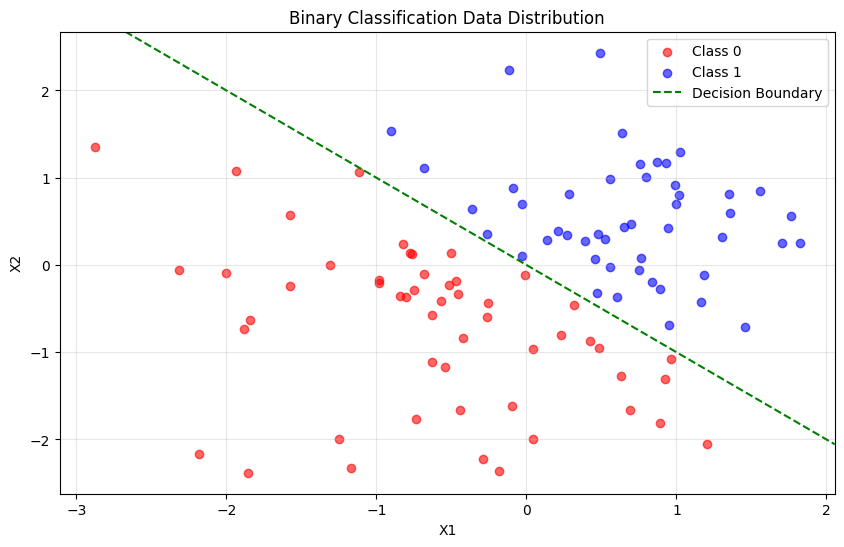

In [8]:
import matplotlib.pyplot as plt

# Make sure we're using the SimpleNet model from cell 0
# Create scatter plot of the data points
plt.figure(figsize=(10, 6))

# Plot points for class 0 and class 1 separately
plt.scatter(X[y==0, 0].numpy(), X[y==0, 1].numpy(), c='red', label='Class 0', alpha=0.6)
plt.scatter(X[y==1, 0].numpy(), X[y==1, 1].numpy(), c='blue', label='Class 1', alpha=0.6)

# Add decision boundary line (y = -x since points are classified based on x + y > 0)
plt.axline([0, 0], [1, -1], color='green', linestyle='--', label='Decision Boundary')

# Customize the plot
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Binary Classification Data Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# Add text showing accuracy on test data
with torch.no_grad():
    # Use the SimpleNet model for binary classification
    test_outputs = model(test_X)
    _, test_predicted = torch.max(test_outputs.data, 1)
    true_labels = (test_X[:, 0] + test_X[:, 1] > 0).long()
    accuracy = (test_predicted == true_labels).float().mean()
    plt.text(0.02, 0.98, f'Test Accuracy: {accuracy:.2%}', 
             transform=plt.gca().transAxes, 
             bbox=dict(facecolor='white', alpha=0.8))

plt.show()